# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut



--2021-03-20 10:57:54--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10330 (10K) [text/plain]
Saving to: ‘lut.py’

lut.py              100%[===================>]  10.09K  --.-KB/s    in 0s      

2021-03-20 10:57:54 (89.7 MB/s) - ‘lut.py’ saved [10330/10330]



Wyświetl przykładowe przekodowanie.

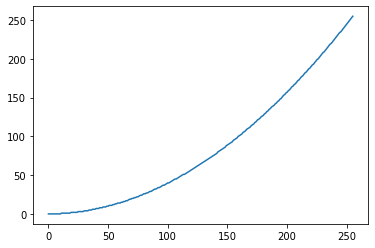

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Przekodowanie kwadratowe
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

--2021-03-20 10:58:19--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66616 (65K) [image/bmp]
Saving to: ‘lena.bmp’

lena.bmp            100%[===================>]  65.05K  --.-KB/s    in 0.009s  

2021-03-20 10:58:19 (7.32 MB/s) - ‘lena.bmp’ saved [66616/66616]



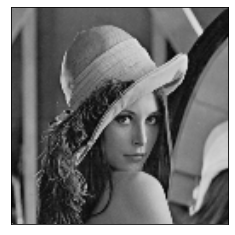

In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

image1 = cv2.imread('lena.bmp')

plt.imshow(image1)
plt.xticks([]), plt.yticks([])
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

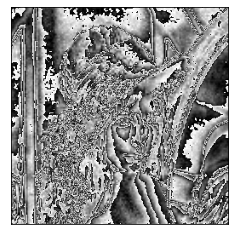

In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

# Przekodujemy obraz
image1 = cv2.LUT(cv2.imread('lena.bmp'), lut.pila)

plt.imshow(image1)
plt.xticks([]), plt.yticks([])
plt.show()

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać.

In [7]:
# Jak narysowac rozne rysunki:

def LUT(obraz, przekodowanie):
  fig = plt.figure()

  # Ustawiamy proporcje
  fig.set_figheight(15)
  fig.set_figwidth(15)
  
  # 1 - ile wierszy, 3 - ile kolumn, 1 - gdzie ten obraz powinien się znajdować
  ax = fig.add_subplot(131)
  ax.set_aspect('equal')
  plt.plot(przekodowanie)
  ax.set_title('Wykres')
  ax = fig.add_subplot(132)
  imgplot = plt.imshow(obraz)
  ax.set_title('Obraz')
  ax = fig.add_subplot(133)
  imgplot = plt.imshow(cv2.LUT(obraz, przekodowanie))

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

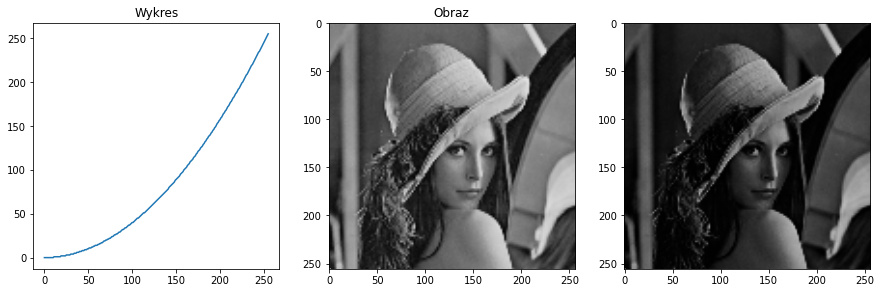

In [8]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def LUT(obraz, przekodowanie):
  fig = plt.figure()
  fig.set_figheight(15)
  fig.set_figwidth(15)
  
  ax = fig.add_subplot(131)
  ax.set_aspect('equal')
  plt.plot(przekodowanie)
  ax.set_title('Wykres')
  ax = fig.add_subplot(132)
  imgplot = plt.imshow(obraz)
  ax.set_title('Obraz')
  ax = fig.add_subplot(133)
  imgplot = plt.imshow(cv2.LUT(obraz, przekodowanie))


if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

image1 = cv2.imread('lena.bmp')

LUT(image1, lut.kwadratowa)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

--2021-03-20 10:59:13--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66616 (65K) [image/bmp]
Saving to: ‘jet.bmp’

jet.bmp             100%[===================>]  65.05K  --.-KB/s    in 0.008s  

2021-03-20 10:59:14 (8.36 MB/s) - ‘jet.bmp’ saved [66616/66616]



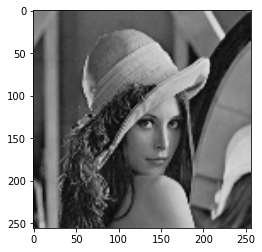

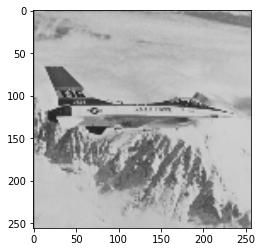

In [9]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

image1 = cv2.imread('lena.bmp')
image2 = cv2.imread('jet.bmp')

plt.imshow(image1)
plt.show()

plt.imshow(image2)
plt.show()

Dodaj obrazy _lena_ i _jet_.
Uzyskany wynik wyświetl.

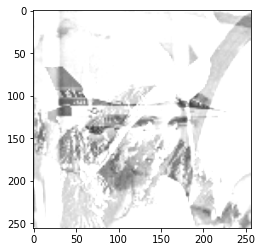

In [10]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

image1 = cv2.imread('lena.bmp')
image2 = cv2.imread('jet.bmp')

plt.imshow(cv2.add(image1, image2))
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

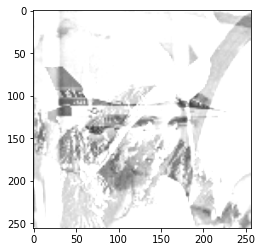

In [11]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

image1 = cv2.imread('lena.bmp')
image2 = cv2.imread('jet.bmp')

wynik = cv2.add(image1, image2)

wynik = wynik.astype('uint16')

plt.imshow(wynik)
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

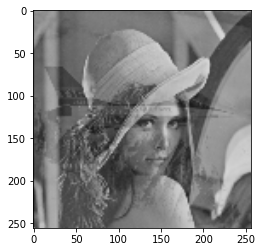

In [12]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

image1 = cv2.imread('lena.bmp')
image2 = cv2.imread('jet.bmp')

plt.imshow(cv2.addWeighted(image1,0.7,image2,0.3,0))
plt.show()

### Odejmowanie

Odejmij obrazy _lena_ i _jet_.

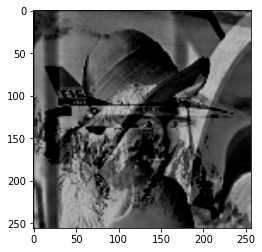

In [13]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

image1 = cv2.imread('lena.bmp')
image2 = cv2.imread('jet.bmp')


plt.imshow(cv2.subtract(image2,image1))
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

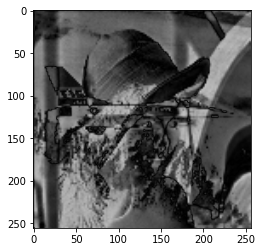

In [14]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

image1 = cv2.imread('lena.bmp')
image2 = cv2.imread('jet.bmp')

image1 = image1.astype('int16')
image2 = image2.astype('int16')

wynik = np.abs(cv2.subtract(image2,image1))

plt.imshow(wynik)
plt.show()

### Mnożenie

Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

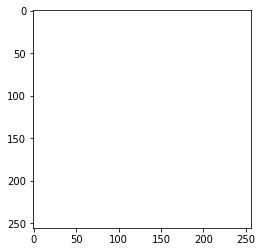

In [16]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

image1 = cv2.imread('lena.bmp')
image2 = cv2.imread('jet.bmp')

wynik = cv2.multiply(image2,image1)

plt.imshow(wynik)
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

--2021-03-20 11:00:38--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66614 (65K) [image/bmp]
Saving to: ‘kolo.bmp’

kolo.bmp            100%[===================>]  65.05K  --.-KB/s    in 0.008s  

2021-03-20 11:00:38 (8.05 MB/s) - ‘kolo.bmp’ saved [66614/66614]



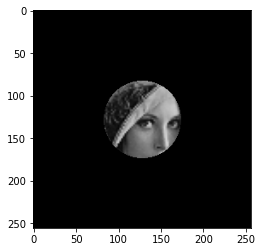

In [17]:
# Dodawanie maski poprzez mnozenie:

import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

if not os.path.exists("kolo.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp


image1 = cv2.imread('lena.bmp')
maska = cv2.imread('kolo.bmp')

maska = maska.astype('bool').astype('uint8')

wynik = cv2.multiply(image1,maska)

plt.imshow(wynik)
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

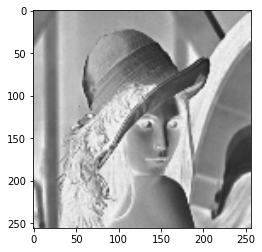

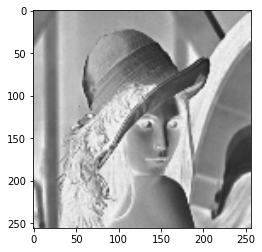

In [18]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("lena.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

image1 = cv2.imread('lena.bmp')

# Negatyw
wynik = cv2.bitwise_not(image1)

plt.imshow(wynik)
plt.show()

wynik = cv2.LUT(image1, lut.odwrotna)
plt.imshow(wynik)
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("kolo.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

if not os.path.exists("kwadrat.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

kolo = cv2.imread('kolo.bmp')
kwadrat = cv2.imread('kwadrat.bmp')

plt.imshow(kolo)
plt.show()

plt.imshow(kwadrat)
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

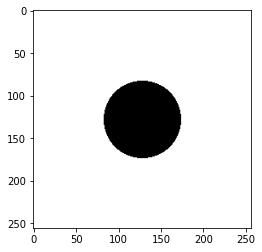

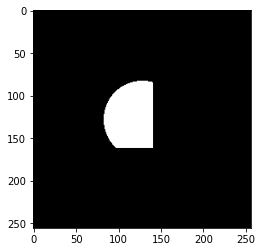

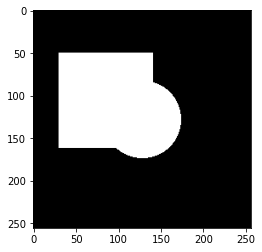

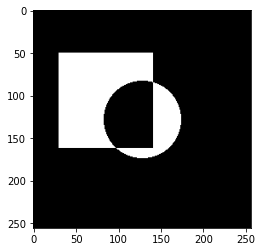

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists("lut.py") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

if not os.path.exists("kolo.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

if not os.path.exists("kwadrat.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

kolo = cv2.imread('kolo.bmp')
kwadrat = cv2.imread('kwadrat.bmp')

plt.imshow(~kolo)
plt.show()

plt.imshow(kwadrat & kolo)
plt.show()

plt.imshow(kwadrat | kolo)
plt.show()

plt.imshow(kwadrat ^ kolo)
plt.show()